# Proyek Analisis Data: Bike Sharing Dataset
- Nama: **Luqman Hakim**
- Email: **luqmanxhakim22042002@gmail.com**
- Id Dicoding: **2608610**

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola permintaan penggunaan sepeda berdasarkan waktu tertentu? Kapan permintaan paling tinggi dan kapan permintaan paling rendah?

0. Apakah terdapat perbedaan karakteristik antara pengguna kasual dan pengguna terdaftar dalam hal pola penggunaan?

0. Apa saja faktor utama yang memengaruhi fluktuasi permintaan penggunaan sepeda?


## Menyiapkan semua library yang dibutuhkan

In [43]:
# import os
# import gdown
# import zipfile
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bike Sharing Dataset

## Data Wrangling

### Gathering Data

In [44]:
day_df = pd.read_csv('./data/day.csv')
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
32,33,2011-02-02,1,0,2,0,3,1,2,0.260000,0.254417,0.775417,0.264308,72,1454,1526
84,85,2011-03-26,2,0,3,0,6,0,1,0.265833,0.257571,0.394167,0.209571,981,1515,2496
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228
454,455,2012-03-30,2,1,3,0,5,1,2,0.370000,0.375621,0.580833,0.138067,796,4663,5459
546,547,2012-06-30,3,1,6,0,6,0,1,0.765000,0.687508,0.601250,0.161071,1455,4232,5687


In [45]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6353,6354,2011-09-27,4,0,9,7,0,2,1,2,0.62,0.5455,0.94,0.1045,15,234,249
14095,14096,2012-08-15,3,1,8,12,0,3,1,1,0.74,0.6818,0.55,0.2239,77,230,307
14371,14372,2012-08-27,3,1,8,0,0,1,1,1,0.62,0.5758,0.83,0.0000,4,28,32
10881,10882,2012-04-03,2,1,4,13,0,2,1,1,0.56,0.5303,0.19,0.2537,120,225,345
4258,4259,2011-07-01,3,0,7,8,0,5,1,1,0.70,0.6364,0.42,0.1642,39,453,492


### Assessing Data

mengecek info masing-masing data frame

In [46]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [47]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan info diatas , kita dapat mengetahui bahwa tidak terdapat kolom dengan missing value. Untuk kolom tanggal yaitu `dteday` akan dibiarkan dalam bentuk string terlebih dahulu. Selanjutnya kita akan mengecek apakah ada data yang terduplikasi.

In [48]:
day_df.duplicated().sum()

0

In [49]:
hour_df.duplicated().sum()

0

Terlihat bahwa tidak ada baris yang terduplikasi, selanjutnnya kita akan melihat apakah ada data yang tidak akurat.

In [50]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [51]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Berdasarkan informasi di atas kita dapat melihat bahwa:
- `season` memiliki rentang nilai 1 sampai 4, sesuai dengan jumlah musim dalam setahun
- `yr` memiliki nilai 0 atau 1
- `mnth` memiliki rentang nilai 1-12, sesuai dengan jumlah bulan dalam setahun
- `holiday` memiliki nilai 0 atau 1
- `weekday` memiliki rentang nilai 0-6, sesuai dengan jumlah hari dalam seminggu
- `workingday` memiliki nilai 0 atau 1
- `weathersit` memiliki nilai antara 1-4 ,sesuai deskripsi dari file Readme
- `temp` memiliki rentang nilai 0 - 1
- `atemp` memiliki rentang nilai 0 - 1
- `hum` memiliki rentang nilai 0 - 1
- `windspeed` memiliki rentang nilai 0 - 1

Jadi, semua kolom yg saya sebutkan sudah terisi dengan benar (tidak terdapat data yang tidak akurat). Sesuai dengan deskripsi yang diberikan di file Readme.

Namun pada `hour_df` terdapat kejanggalan, karena seharusnya nilai `mean` pada kolom `hr` atau jam pas 11.5 (hanya ada angka 5 dibelakang koma).

In [52]:
by_date_instat = hour_df.groupby(by="dteday").agg({'instant':'count'}).reset_index()
by_date_instat[by_date_instat['instant'] < 24].sort_values('instant')

,dteday,instant
667,2012-10-29,1
26,2011-01-27,8
668,2012-10-30,11
17,2011-01-18,12
25,2011-01-26,16
...,...,...
723,2012-12-24,23
69,2011-03-11,23
71,2011-03-13,23
34,2011-02-04,23


ternyata data pada `hour_df` ada yang tidak lengkap untuk 24 jam pada beberapa tanggal. Untuk mengatasi hal ini pertama saya akan menggabungkan kolom `dteday` dan `hr` menjadi kolom `datetime`

### Cleaning Data

In [53]:
hour_df['datetime'] = pd.to_datetime(hour_df.dteday) + pd.to_timedelta(hour_df['hr'], unit='h')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00


In [54]:
# menambahkan baris-baris yang missing
min_datetime = hour_df.datetime.min()
max_datetime = hour_df.datetime.max()
all_datetime = pd.date_range(min_datetime, max_datetime, freq='H')
datetime_df = pd.DataFrame({'datetime':all_datetime})
new_hour_df = pd.merge(datetime_df, hour_df, on='datetime', how='left')
new_hour_df.sort_index(inplace=True)
# mengatasi null pada kolom yang berkaitan dengan waktu
fill_hr = lambda row: int(row['datetime'].hour) if pd.isnull(row['hr']) else int(row['hr'])
fill_dteday = lambda row: row['datetime'].strftime('%Y-%m-%d') if pd.isnull(row['dteday']) else row['dteday']
fill_month = lambda row: int(row['datetime'].month) if pd.isnull(row['mnth']) else int(row['mnth'])
def fill_yr(row):
    if pd.isnull(row['yr']):
        yr = 0 if int(row['datetime'].year) == 2011 else 1
        return yr
    return int(row['yr'])

new_hour_df.hr = new_hour_df.apply(fill_hr, axis=1)
new_hour_df.dteday = new_hour_df.apply(fill_dteday, axis=1)
new_hour_df.mnth = new_hour_df.apply(fill_month, axis=1)
new_hour_df.yr = new_hour_df.apply(fill_yr, axis=1)

new_hour_df.set_index('datetime',inplace=True)
new_hour_df[['hr','yr','dteday','mnth',]].describe(include='all')

,hr,yr,dteday,mnth
count,17544.000000,17544.000000,17544,17544.000000
unique,NaN,NaN,731,NaN
top,NaN,NaN,2011-01-01,NaN
freq,NaN,NaN,24,NaN
mean,11.500000,0.500684,NaN,6.519836
std,6.922384,0.500014,NaN,3.449649
min,0.000000,0.000000,NaN,1.000000
25%,5.750000,0.000000,NaN,4.000000
50%,11.500000,1.000000,NaN,7.000000
75%,17.250000,1.000000,NaN,10.000000


selanjutnya mengatasi null value pada kolom yang berkaitan pada hari tersebut

In [55]:
new_hour_df.season.interpolate('pad', inplace=True)
new_hour_df.holiday.interpolate('pad', inplace=True)
new_hour_df.weekday.interpolate('pad', inplace=True)
new_hour_df.workingday.interpolate('pad', inplace=True)
new_hour_df.weathersit.interpolate('pad', inplace=True)

new_hour_df.season = new_hour_df.season.astype(int)
new_hour_df.holiday = new_hour_df.holiday.astype(int)
new_hour_df.weekday = new_hour_df.weekday.astype(int)
new_hour_df.workingday = new_hour_df.workingday.astype(int)
new_hour_df.weathersit = new_hour_df.weathersit.astype(int)

new_hour_df[['season','holiday','weekday','workingday','weathersit']].describe()

,season,holiday,weekday,workingday,weathersit
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,2.496580,0.029754,2.996979,0.682969,1.434223
std,1.110079,0.169912,2.004567,0.465333,0.648339
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,1.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,1.000000,1.000000
75%,3.000000,0.000000,5.000000,1.000000,2.000000
max,4.000000,1.000000,6.000000,1.000000,4.000000


mengiatasi null value pada sisa kolom kecuali 'instant'

In [56]:
new_hour_df.temp.interpolate('time', direction='forward', inplace=True)
new_hour_df.atemp.interpolate('time', direction='forward', inplace=True)
new_hour_df.hum.interpolate('time', direction='forward', inplace=True)
new_hour_df.windspeed.interpolate('time', direction='forward', inplace=True)
new_hour_df.casual.interpolate('time', direction='forward', inplace=True)
new_hour_df.registered.interpolate('time', direction='forward', inplace=True)
new_hour_df.cnt.interpolate('time', direction='forward', inplace=True)

new_hour_df.casual = new_hour_df.casual.astype(int)
new_hour_df.registered = new_hour_df.registered.astype(int)
new_hour_df.cnt = new_hour_df.cnt.astype(int)

new_hour_df[['temp','atemp','hum','windspeed','casual','registered','cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000,17544.000000
mean,0.495044,0.473957,0.628428,0.190965,35.355506,152.524624,187.882752
std,0.193192,0.172519,0.193041,0.122900,49.183638,151.221298,181.281523
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,38.000000
50%,0.500000,0.484800,0.630000,0.194000,16.000000,114.000000,140.000000
75%,0.660000,0.621200,0.790000,0.253700,48.000000,219.000000,279.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [57]:
new_hour_df.isna().sum()

instant       165
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

In [58]:
new_hour_df.duplicated().sum()

0

In [59]:
new_hour_df.reset_index(inplace=True)
new_hour_df.drop('datetime', axis=1, inplace=True)
new_hour_df['instant'] = np.arange(len(new_hour_df)) + 1
new_hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16954,16955,2012-12-07,4,1,12,10,0,5,1,2,0.32,0.3182,0.76,0.1642,16,150,166
8275,8276,2011-12-11,4,0,12,19,0,0,0,1,0.22,0.2273,0.55,0.1940,7,98,105
17021,17022,2012-12-10,4,1,12,5,0,1,1,2,0.38,0.3939,0.94,0.1045,0,27,27
14444,14445,2012-08-24,3,1,8,20,0,5,1,2,0.70,0.6515,0.65,0.2239,66,297,363
10739,10740,2012-03-23,2,1,3,11,0,5,1,2,0.62,0.5909,0.73,0.1045,131,187,318
1585,1586,2011-03-08,1,0,3,1,0,2,1,1,0.24,0.2424,0.52,0.1343,0,4,4
111,112,2011-01-05,1,0,1,15,0,3,1,1,0.30,0.2879,0.28,0.1940,7,55,62
4096,4097,2011-06-20,2,0,6,16,0,1,1,1,0.70,0.6515,0.58,0.1642,61,238,299
2875,2876,2011-04-30,2,0,4,19,0,6,0,1,0.54,0.5152,0.43,0.1343,150,237,387
9126,9127,2012-01-16,1,1,1,6,1,1,0,1,0.10,0.1364,0.54,0.0896,0,13,13


In [60]:
new_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17544 non-null  int32  
 1   dteday      17544 non-null  object 
 2   season      17544 non-null  int32  
 3   yr          17544 non-null  int64  
 4   mnth        17544 non-null  int64  
 5   hr          17544 non-null  int64  
 6   holiday     17544 non-null  int32  
 7   weekday     17544 non-null  int32  
 8   workingday  17544 non-null  int32  
 9   weathersit  17544 non-null  int32  
 10  temp        17544 non-null  float64
 11  atemp       17544 non-null  float64
 12  hum         17544 non-null  float64
 13  windspeed   17544 non-null  float64
 14  casual      17544 non-null  int32  
 15  registered  17544 non-null  int32  
 16  cnt         17544 non-null  int32  
dtypes: float64(4), int32(9), int64(3), object(1)
memory usage: 1.7+ MB


In [61]:
new_day_df = new_hour_df.groupby(by='dteday').agg({
                'season':'mean',
                'yr':'mean',
                'mnth':'mean',
                'holiday':'mean',
                'weekday':'mean',
                'workingday':'mean',
                'weathersit':'mean',
                'temp':'mean',
                'atemp':'mean',
                'hum':'mean',
                'windspeed':'mean',
                'casual':'sum',
                'registered':'sum',
                'cnt':'sum',
            }).reset_index()
new_day_df.reset_index(inplace=True)

In [62]:
new_day_df.season = new_day_df.season.astype(int)
new_day_df.yr = new_day_df.yr.astype(int)
new_day_df.mnth = new_day_df.mnth.astype(int)
new_day_df.holiday = new_day_df.holiday.astype(int)
new_day_df.weekday = new_day_df.weekday.astype(int)
new_day_df.workingday = new_day_df.workingday.astype(int)

new_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int32  
 3   yr          731 non-null    int32  
 4   mnth        731 non-null    int32  
 5   holiday     731 non-null    int32  
 6   weekday     731 non-null    int32  
 7   workingday  731 non-null    int32  
 8   weathersit  731 non-null    float64
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int32  
 14  registered  731 non-null    int32  
 15  cnt         731 non-null    int32  
dtypes: float64(5), int32(9), int64(1), object(1)
memory usage: 65.8+ KB


## Exploratory Data Analysis

Pertama saya ingin mengetahui korelasi antara setiap parameter dengan banyaknya pengguna sepeda pada suatu hari

In [63]:
parameters = ["mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"]
new_day_df.loc[:,parameters].corrwith(new_day_df.cnt)

mnth          0.282061
holiday      -0.068979
weekday       0.070836
workingday    0.072996
weathersit   -0.360776
temp          0.629591
atemp         0.633822
hum          -0.101438
windspeed    -0.241590
dtype: float64

Berdasarkan informasi di atas, kita dapat mengetahui beberapa hal
* Suhu, `temp & atemp` memiliki korelasi positif yang tinggi.Ini berarti para pengguna cenderung bersepeda saat suhu di luar sedang hangat.
* Bulan atau `mnth` memilik korelasi positif tetapi tidak terlalu signifikat.
* Agak diluar dugaan bahwa hari tidak memiliki korelasi signifikat terhadap jumlah pengguna sepeda, `holiday, weekday, workingday` memiliki korelasi mendekati 0.
* `weathersit, hum , windspeed` memiliki korelasi negatif yang tidak terlalu signifikat.

Tetapi ini adalah hasil korelasi terhadap `cnt` yang mana merupakan gabungan antara dua tipe pengguna. Selanjutnya saya akan melihat korelasi setiap parameter terhadap kedua tipe pengguna.

In [64]:
new_day_df.loc[:,parameters].corrwith(new_day_df.casual)

mnth          0.123443
holiday       0.054223
weekday       0.063192
workingday   -0.509955
weathersit   -0.313362
temp          0.543846
atemp         0.544716
hum          -0.077970
windspeed    -0.171251
dtype: float64

Berdasarkan informasi diatas ,kita dapat mengetahui beberapa hal
* Suhu masih tetap menjadi faktor penting bagi pengguna kasual
* `workingday` atau hari kerja memiliki korelasi negatif yang signifikat. Ini berarti para pengguna kasual lebih menyukai bersepeda disaat weekend atau hari libur. Tetapi anehnya `holiday` tidak memiliki korelasi yang signifikat, apakah pengguna kasual lebih cenderung bersepeda di hari weekend ?
* parameter `weathersit, hum , windspeed` masih memiliki korelasi yang kurang signifikat

untuk menjawab pertanyaan tersebut saya akan memodifikasi kolom `weekday` dengan membuat standar hari mulai dari hari senin = 1 - minggu = 7.

In [65]:
new_day_df.weekday.mask(new_day_df.weekday==0,7, inplace=True)
new_day_df.loc[:,parameters].corrwith(new_day_df.casual)

mnth          0.123443
holiday       0.054223
weekday       0.416689
workingday   -0.509955
weathersit   -0.313362
temp          0.543846
atemp         0.544716
hum          -0.077970
windspeed    -0.171251
dtype: float64

dan benar, weekday memiliki korelasi positif yang cukup signifikat.

selanjutnya kita akan melihat korelasi masing-masing parameter terhadap pengguna tipe "registered"

In [66]:
new_day_df.loc[:,parameters].corrwith(new_day_df.registered)

mnth          0.295817
holiday      -0.109637
weekday      -0.185824
workingday    0.316008
weathersit   -0.309757
temp          0.541759
atemp         0.546632
hum          -0.091576
windspeed    -0.224469
dtype: float64

Berdasarkan informasi diatas ,kita dapat mengetahui beberapa hal. Suhu tentunya masih merupakan faktor penting bagi pengguna tipe "registered". Tapi terdapat sedikit perbedaan terhadap pengguna kasual, pengguna tipe "registered" cenderung lebih sering menggunakan sepeda pada hari kerja. Mungkin karena pengguna tipe ini menggunakan sepeda untuk sarana transportasi mereka saat bekerja ? kita tidak dapat mengetahui pastinya.

selanjutnya saya ingin melihat di jam-jam berapa pengguna cenderung bersepeda

In [67]:
new_hour_df.groupby(by='hr').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
}).sort_values('cnt',ascending=False)

,casual,registered,cnt
hr,,,
17,54226,282699,336925
18,44503,265375,309878
8,15773,245398,261173
16,53839,173970,227810
19,35512,191384,226897
13,52718,132278,184998
12,49732,134868,184603
15,54611,128620,183233
14,55094,120638,175733


Membagi waktu menjadi beberapa bagian.

In [68]:
def kelompokwaktu(hr):
  if hr in [0,1,2,19,20,21,22,23]:
    return "malam"
  if hr in [3,4,5,6,7,8,9]:
    return 'pagi'
  if hr in [10,11,12,13,14]:
    return 'siang'
  if hr in [15,16,17,18]:
    return 'sore'

new_hour_df['hr_group'] = new_hour_df.hr.apply(kelompokwaktu)
new_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr_group
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,malam
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,malam
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,malam
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,pagi
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,pagi


In [69]:
new_hour_df.groupby(by='hr_group').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum',
}).sort_values('cnt',ascending=False)

,casual,registered,cnt
hr_group,,,
sore,207179,850664,1057846
siang,234647,588623,823279
malam,125299,631771,757080
pagi,53152,604834,658010


berdasarkan informasi diatas dapat dilihat bahwa secara keseluruhan pengguna sepeda lebih cenderung menggunakan sepeda di sore hari

## Data Visualization

### visualisasi statistik harian

In [70]:
new_hour_df['dteday'] = pd.to_datetime(new_hour_df['dteday'])
new_day_df['dteday'] = pd.to_datetime(new_day_df['dteday'])

In [71]:
def plot_per_hours(day, df):
  one_day = df.loc[df.dteday == day].copy()
  # normalisasi
  one_day.casual = (one_day.casual - one_day.casual.mean()) / one_day.casual.std()
  one_day.registered = (one_day.registered - one_day.registered.mean()) / one_day.registered.std()

  plt.figure(figsize=(12, 5))
  plt.plot(one_day['hr'], one_day['casual'], color='#66ff66')
  plt.plot(one_day['hr'], one_day['registered'], color='#ff6666')
  plt.title(f'user stats on {day.date()}')
  plt.xticks(one_day['hr'])
  plt.yticks([])
  plt.xlabel('hour',size=15)
  plt.ylabel("Stats")
  plt.legend(['casual user','registered user'])
  plt.show()

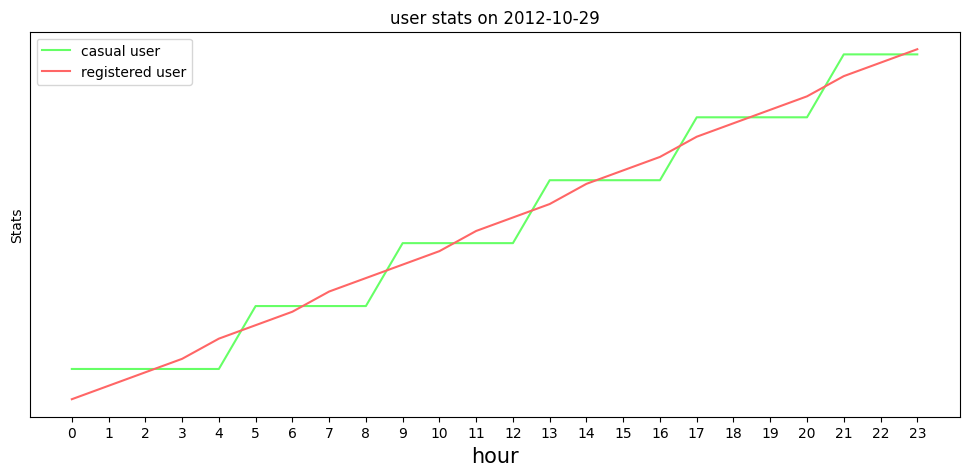

In [72]:
plot_per_hours(datetime.datetime(2012,10,29),new_hour_df)

### Visualisasi keramaian pengguna berdasarkan jam

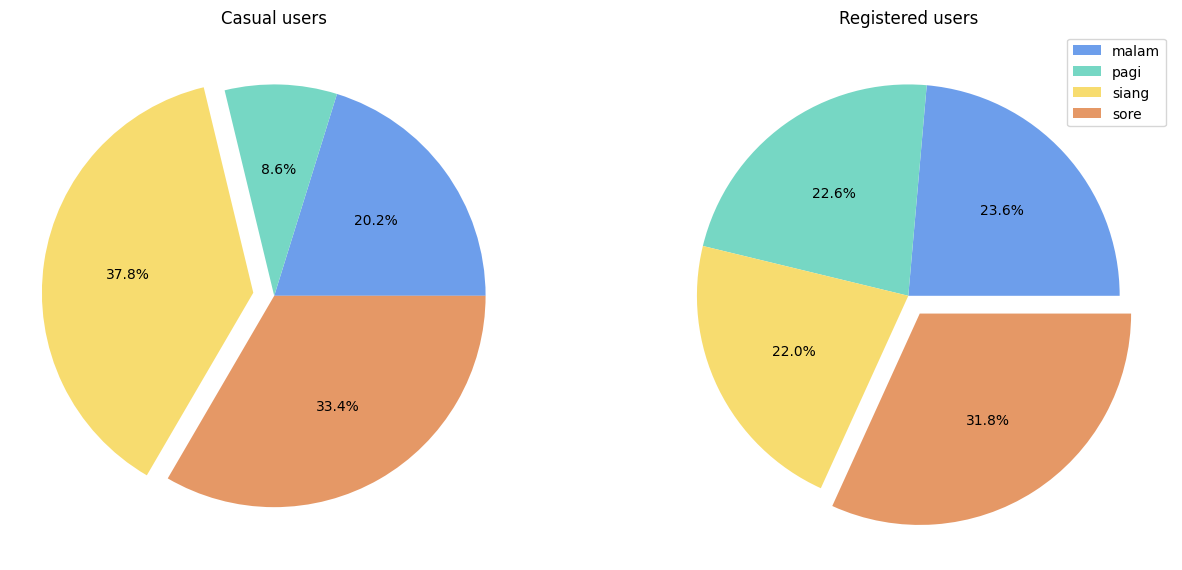

In [73]:
by_hr_group =  new_hour_df.groupby(by='hr_group').agg({
                    'casual':'sum',
                    'registered':'sum',
                }).reset_index()

fig = plt.gcf()
fig.set_size_inches(15,15)
colors = ('#6D9EEB', '#76D7C4', '#F7DC6F', '#E59866')

plt.subplot(1,2,1)
plt.title('Casual users')
plt.pie(
    x=by_hr_group.casual,
    autopct='%1.1f%%',
    colors=colors,
    explode=(0, 0, 0.1, 0)
)

plt.subplot(1,2,2)
plt.title('Registered users')
plt.pie(
    x=by_hr_group.registered,
    autopct='%1.1f%%',
    colors=colors,
    explode=(0, 0, 0, 0.1)
)
plt.legend(by_hr_group.hr_group)
plt.show()

### Visualisasi keramaian pengguna berdasarkan hari

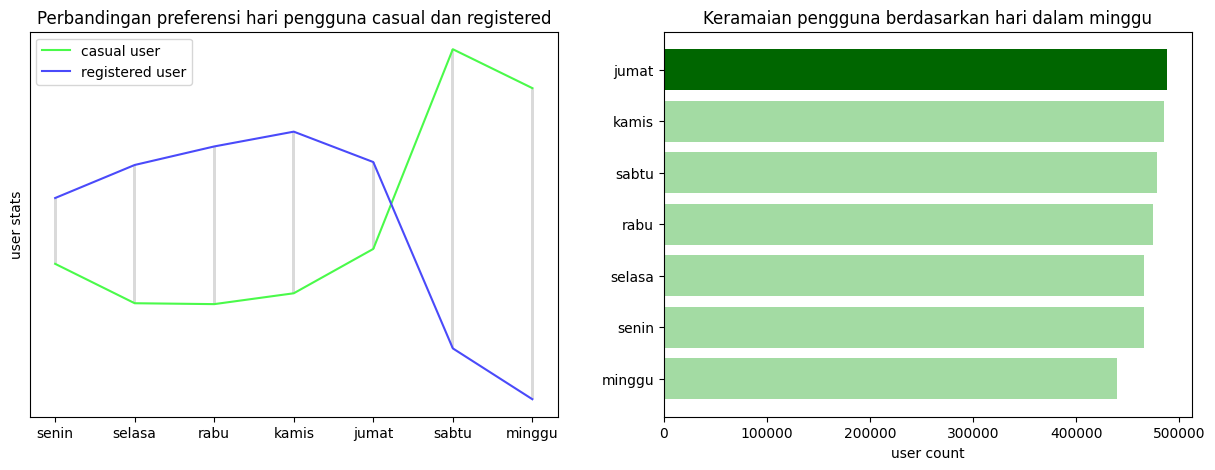

In [74]:
by_weekday =  new_day_df.groupby(by='weekday').agg({
                    'casual':'sum',
                    'registered':'sum',
                    'cnt':'sum'
                }).reset_index()

by_weekday.weekday = ['senin','selasa','rabu','kamis','jumat','sabtu','minggu']

norm_casual = (by_weekday.casual - by_weekday.casual.mean()) / by_weekday.casual.std()
norm_registered = (by_weekday.registered - by_weekday.registered.mean()) / by_weekday.registered.std()

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(by_weekday.weekday, norm_casual, 0.04, color='#dadada')
ax[0].bar(by_weekday.weekday, norm_registered, 0.04, color='#dadada')
ax[0].plot(by_weekday.weekday, norm_casual, label = 'casual user', color='#4afa4a')
ax[0].plot(by_weekday.weekday, norm_registered, label = 'registered user', color='#4a4afa')
ax[0].set_yticks([])
ax[0].set_ylabel("user stats")
ax[0].set_title("Perbandingan preferensi hari pengguna casual dan registered")
ax[0].legend()

colors = ["#A3DBA3","#A3DBA3", "#A3DBA3","#A3DBA3", "#A3DBA3","#A3DBA3", "#006600",]
ax[1].barh('weekday', 'cnt',data=by_weekday.sort_values(by='cnt') ,color = colors)
ax[1].set_xlabel("user count")
ax[1].set_title("Keramaian pengguna berdasarkan hari dalam minggu")
plt.show()

### Visualisasi keramaian pengguna berdasarkan siklus per tahun

In [75]:
def plot_yearly(new_hour_df, year=None):
  if year is not None:
    new_hour_df = new_hour_df[new_hour_df.yr==year].copy()
  by_month = new_hour_df.groupby(by='mnth').agg({
                      'cnt':'sum'
                  }).reset_index()
  by_month.mnth = ['Januari','Februari', 'Maret','April','Mei','Juni','Juli','Agustus','September','Oktober','November','Desember']
  by_season = new_hour_df.groupby(by='season').agg({
                      'cnt':'sum'
                  }).reset_index()
  by_season.season = ['spring', 'summer', 'fall', 'winter']

  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].pie(
      x = by_season.cnt,
      labels = by_season.season,
      autopct='%1.1f%%',
      colors=['#A8D08D', '#F4C542', '#D97B4C', '#A4C8E4'],
      explode=(0, 0, 0.1, 0)
  )
  ax[0].set_title("Jumlah Pengguna Setiap Musim")


  ax[1].bar('mnth', 'cnt',0.5,data=by_month ,color = '#fadada')
  ax[1].plot('mnth', 'cnt',data=by_month ,color = '#fa4a4a')
  ax[1].set_xticks(by_month.mnth, labels=by_month.mnth, rotation=45)
  ax[1].yaxis.tick_right()
  ax[1].yaxis.set_label_position("right")
  ax[1].set_ylabel("user count")
  ax[1].set_title("Jumlah pengguna per bulan")
  plt.suptitle(f"Siklus jumlah pengguna per tahun {2011 if year==0 else 2012 if year==1 else ''}")
  plt.show()

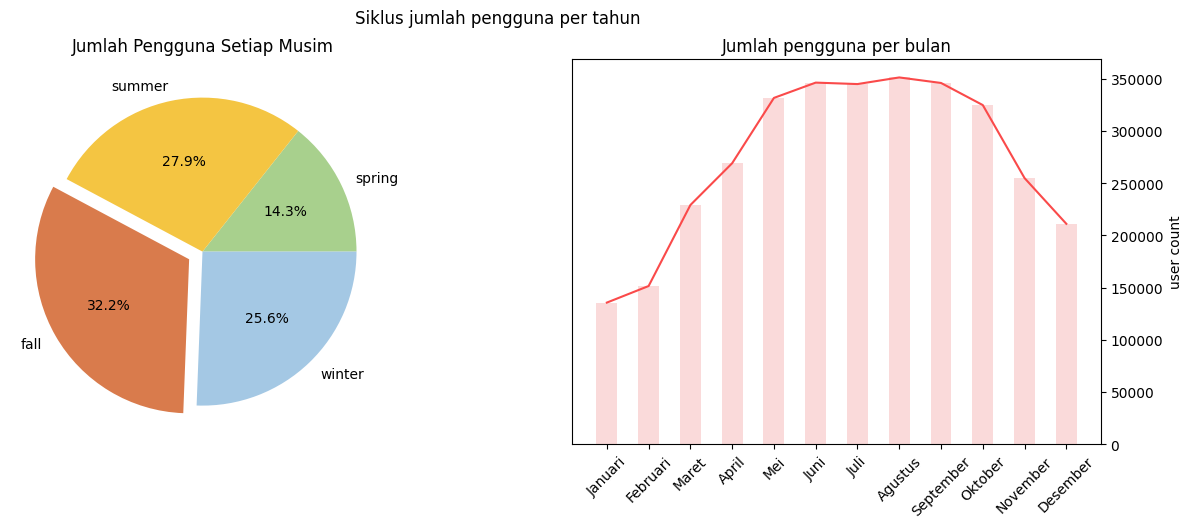

In [76]:
plot_yearly(new_hour_df)

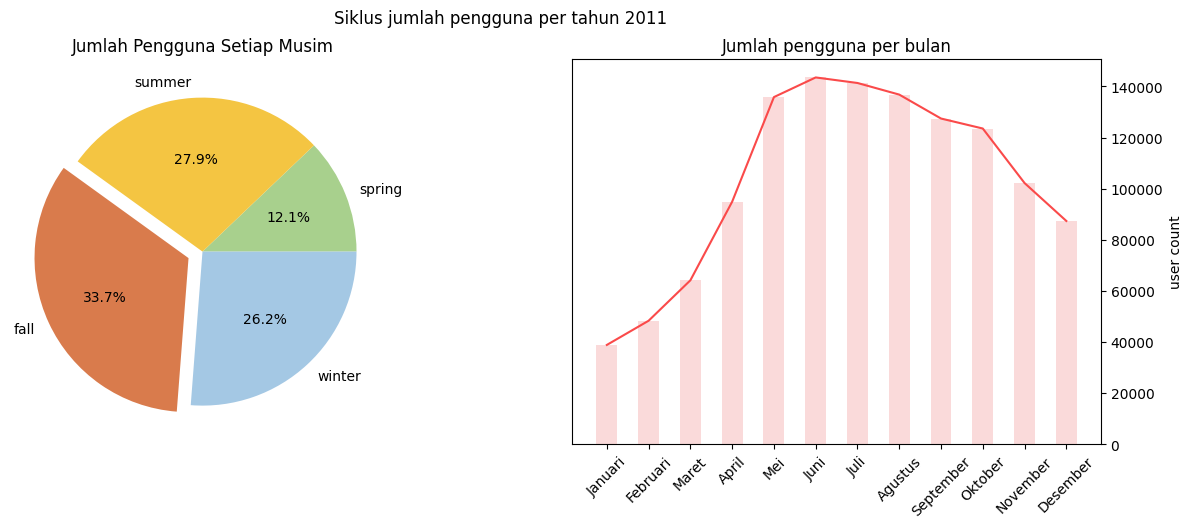

In [77]:
plot_yearly(new_hour_df,0)

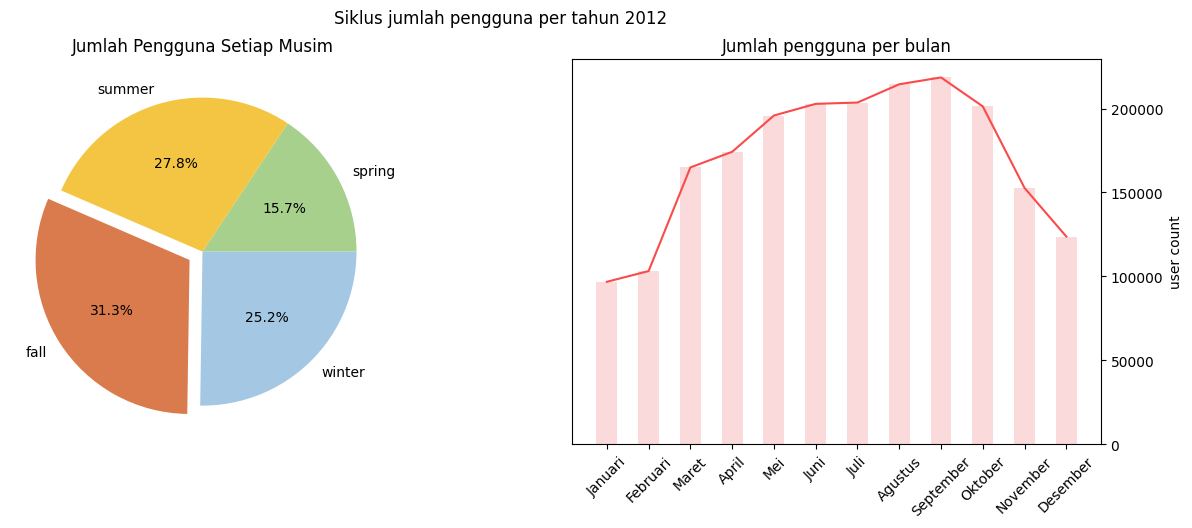

In [78]:
plot_yearly(new_hour_df,1)

### Visualisasi korelasi setiap parameter terhadap keramaian pengguna

In [79]:
def get_corr(df, _with):
  corr_index = ["month","holiday","weekday","working day","weather","temperature","feeling temperature","humidity","windspeed",]
  _with = df[_with]
  corr = df.loc[:,parameters].corrwith(_with)
  corr.index = corr_index
  corr = corr.abs().reset_index().rename({0:'corr'}, axis=1)
  return corr

In [80]:
def corr_barplot(df, _with):
  corr = get_corr(df, _with)
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

  colors1 = ["#4CAF50", "#66BB6A", "#81C784", "#A5D6A7", "#C8E6C9"]
  colors2 = ["#FF7043", "#FF5722", "#F4511E", "#D32F2F", "#C62828"]

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=False).head(), palette=colors1, ax=ax[0])
  ax[0].set_ylabel(None)
  ax[0].set_xlabel(None)
  ax[0].set_title("Most Correlation", loc="center", fontsize=15)
  ax[0].tick_params(axis ='y', labelsize=12)

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=True).head(), palette=colors2, ax=ax[1])
  ax[1].set_ylabel(None)
  ax[1].set_xlabel(None)
  ax[1].invert_xaxis()
  ax[1].yaxis.set_label_position("right")
  ax[1].yaxis.tick_right()
  ax[1].set_title("Least Correlation", loc="center", fontsize=15)
  ax[1].tick_params(axis='y', labelsize=12)

  plt.suptitle(f"Most and Least correlation with '{_with}' column ", fontsize=20)
  plt.show()

C:\Users\LUQMAN\AppData\Local\Temp\ipykernel_21484\104667069.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=False).head(), palette=colors1, ax=ax[0])
C:\Users\LUQMAN\AppData\Local\Temp\ipykernel_21484\104667069.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=True).head(), palette=colors2, ax=ax[1])


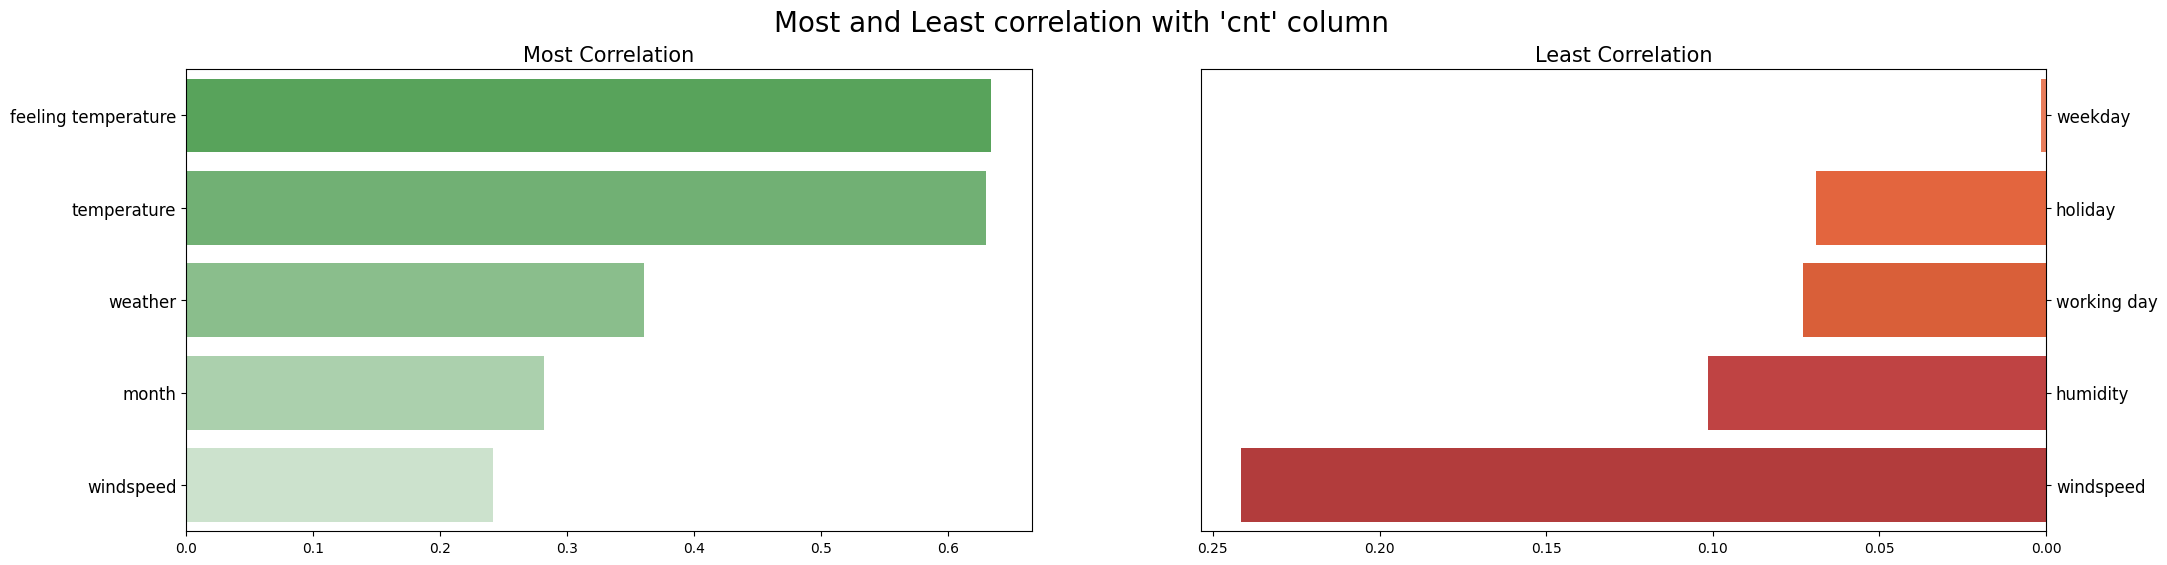

In [81]:
corr_barplot(new_day_df,'cnt')

C:\Users\LUQMAN\AppData\Local\Temp\ipykernel_21484\104667069.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=False).head(), palette=colors1, ax=ax[0])
C:\Users\LUQMAN\AppData\Local\Temp\ipykernel_21484\104667069.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=True).head(), palette=colors2, ax=ax[1])


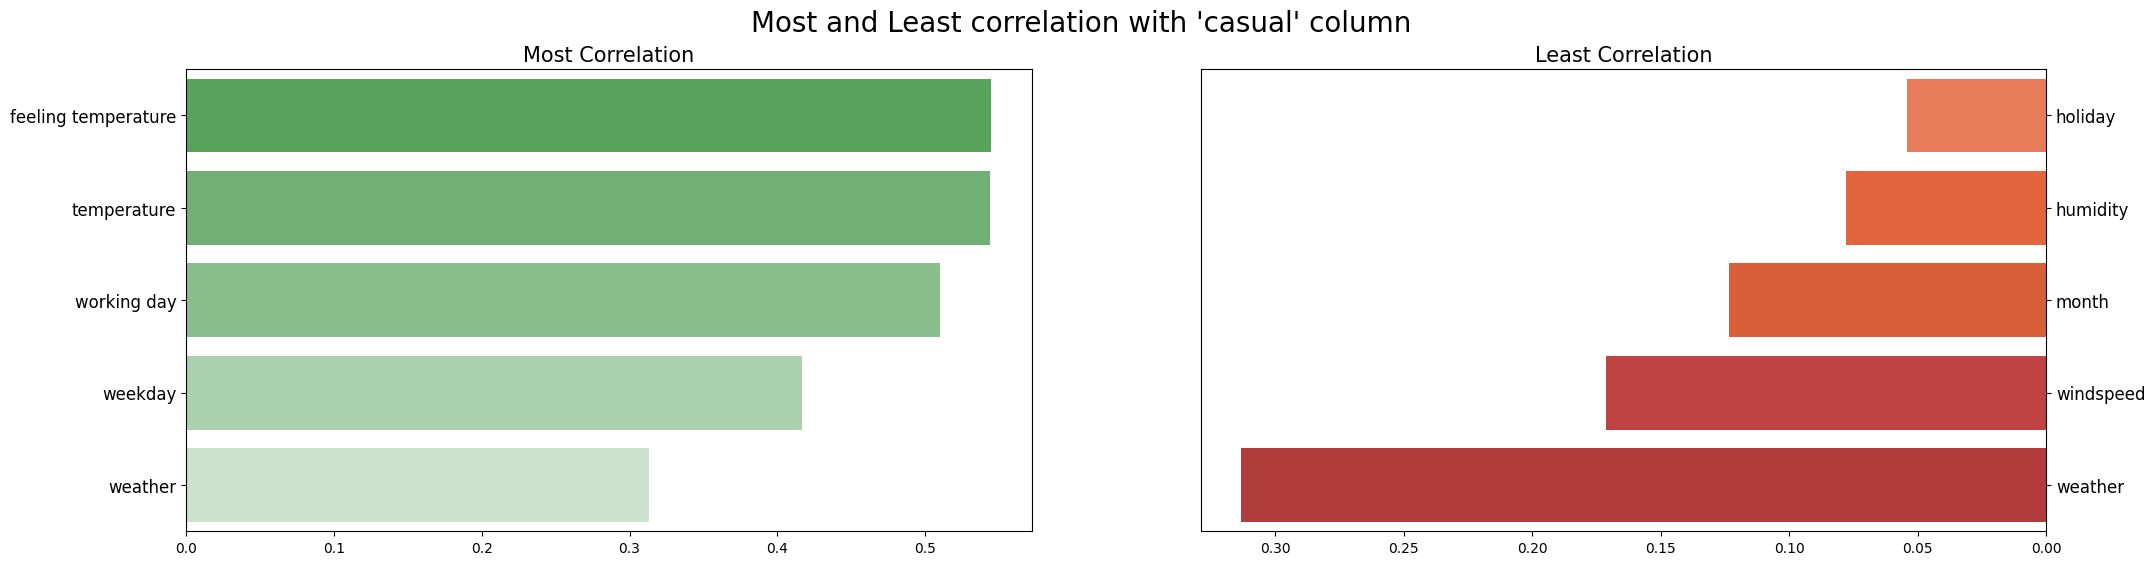

In [82]:
corr_barplot(new_day_df,'casual')

C:\Users\LUQMAN\AppData\Local\Temp\ipykernel_21484\104667069.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=False).head(), palette=colors1, ax=ax[0])
C:\Users\LUQMAN\AppData\Local\Temp\ipykernel_21484\104667069.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='corr', y='index',data=corr.sort_values(by="corr",ascending=True).head(), palette=colors2, ax=ax[1])


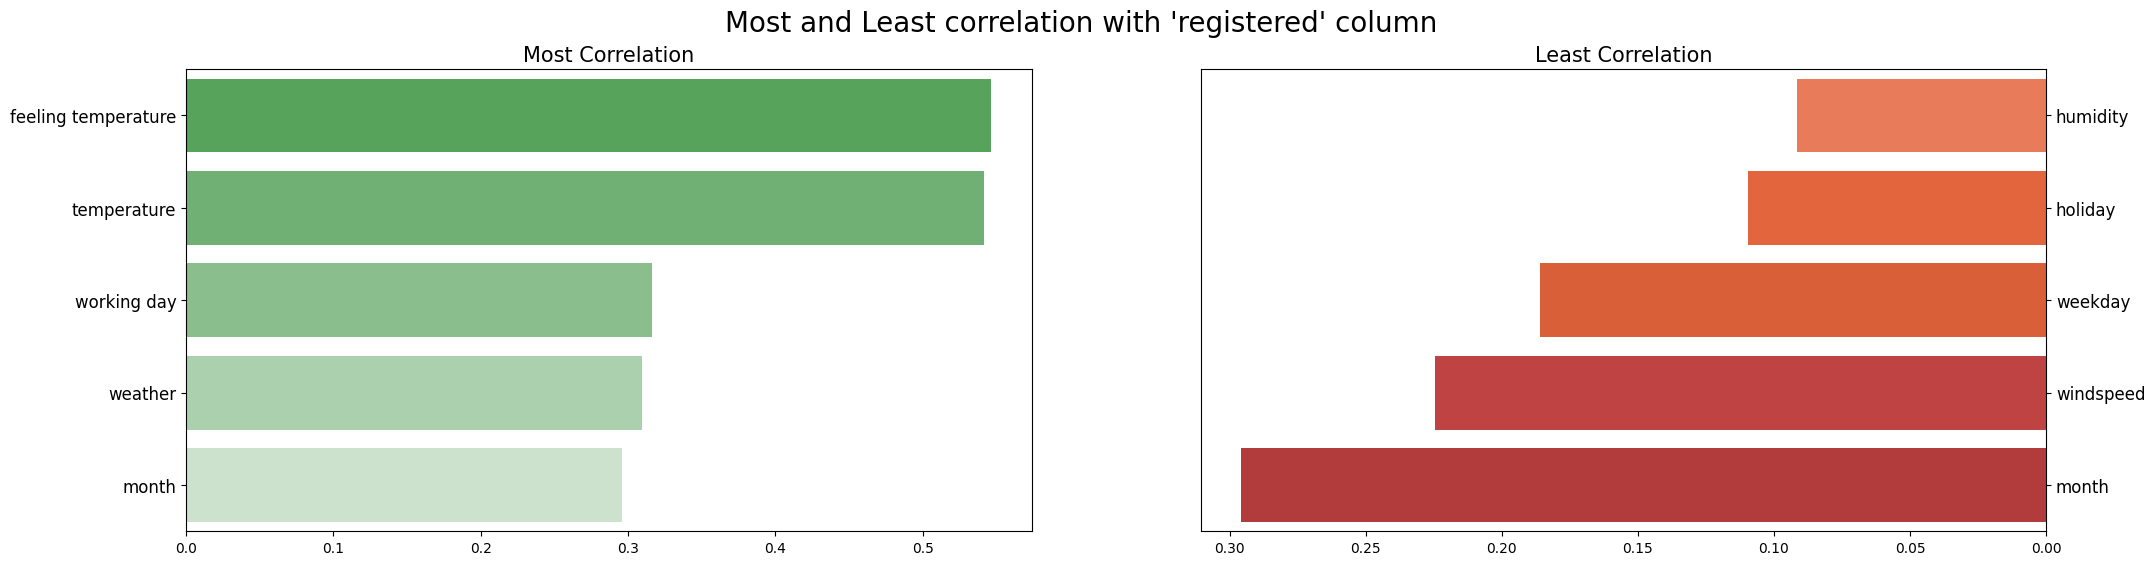

In [83]:
corr_barplot(new_day_df,'registered')

## Kesimpulan

Berdasarkan explorasi dan visualisasi yang saya lakukan saya adapun kesimpulan dari saya yaitu :

1. Setiap tahunnya, permintaan sepeda cenderung lebih tinggi pada musim gugur dan lebih rendah pada musim semi. Selisih antara musim panas dan musim dingin relatif kecil jika dibandingkan dengan musim gugur.

2. Terdapat perbedaan yang signifikan antara pengguna kasual dan pengguna terdaftar dalam hal preferensi penggunaan sepeda. Pengguna kasual lebih sering menggunakan sepeda pada akhir pekan dan di siang hari, sementara pengguna terdaftar lebih sering menggunakan sepeda pada hari kerja, terutama pada sore hari.

3. Faktor utama yang mempengaruhi naik turunnya permintaan sepeda adalah suhu udara pada hari tersebut. Pengguna cenderung lebih banyak menggunakan sepeda saat suhu berada dalam kisaran yang nyaman, terutama saat cuaca hangat.

In [84]:
# menyimpan data yang sudah diproses
new_day_df.to_csv('dashboard/new_day.csv',index=False)
new_hour_df.to_csv('dashboard/new_hour.csv',index=False)